<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Sales Prediction Using ANN
    </h3>
    </div>

* Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

* In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine
  learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark onthe journey of sales prediction using machine learning in Python.

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        TABLE OF CONTENT
    </h3>
    </div>

* **Importing Libraries and Loading Data**

* **Data Information and Data Cleaning**

* **Data Visualisation**

* **Building Artificial Neural Network**


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Importing Libraries
    </h3>
    </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Data Information and Data Cleaning
    </h3>
    </div>

In [2]:
df = data = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv",encoding='ISO-8859-1')

In [3]:
df.shape

(500, 9)

In [4]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [5]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df.drop(columns=['customer name', 'customer e-mail', 'country'], inplace=True)

In [7]:
df.dropna(subset=['gender'], inplace = True)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Data Visualisation
    </h3>
    </div>

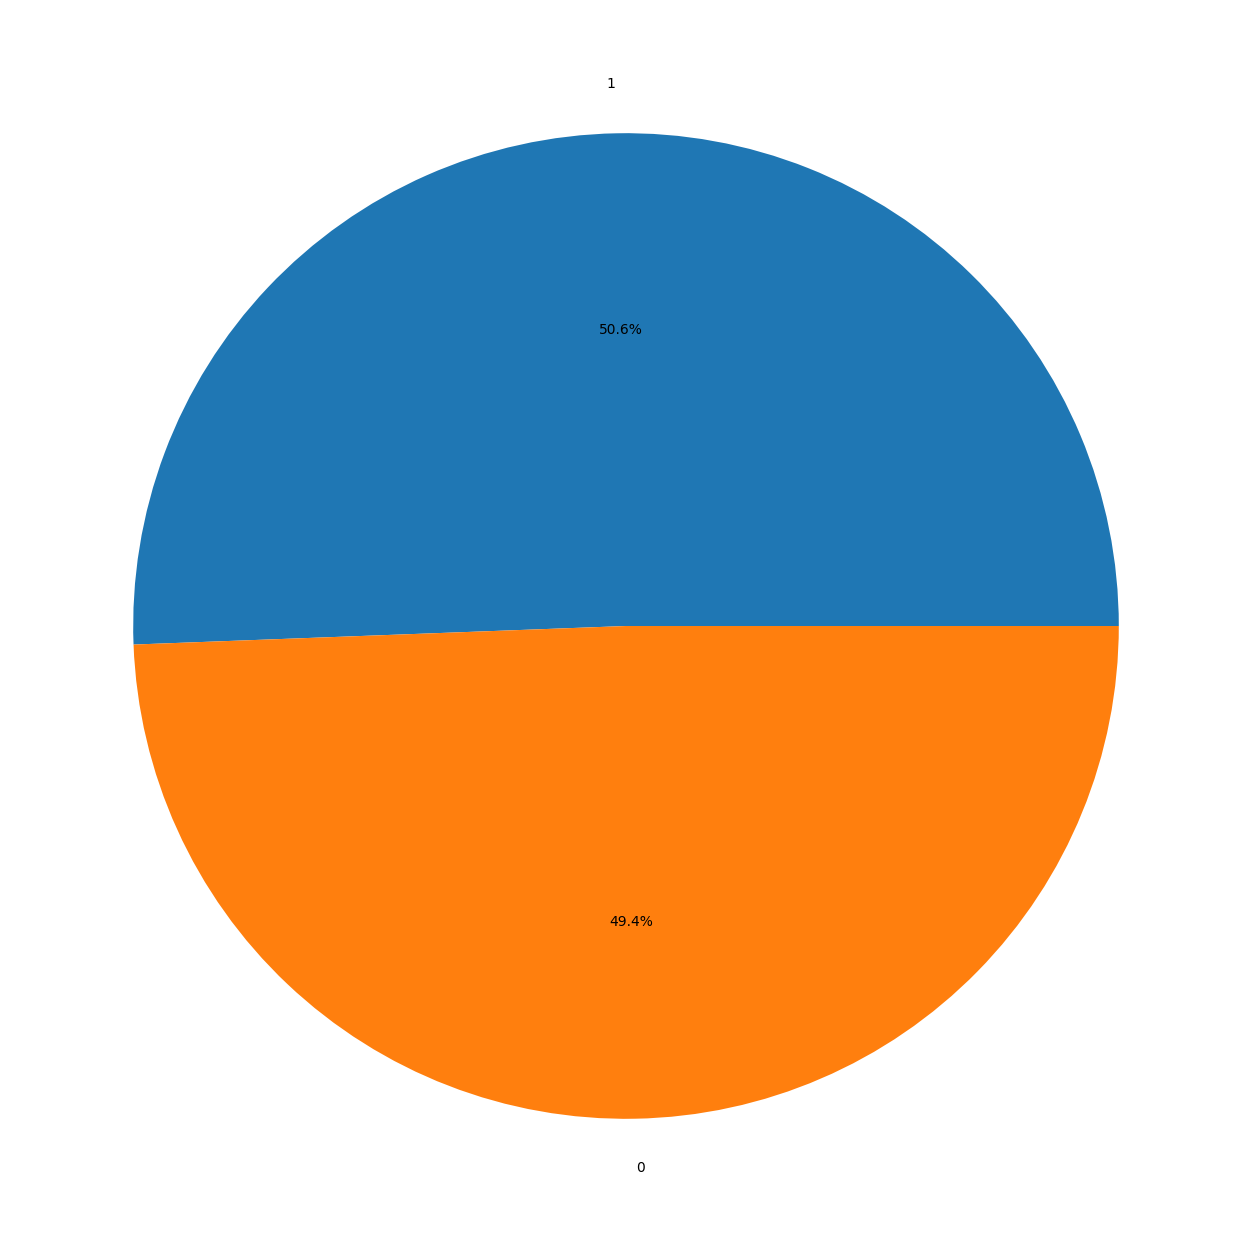

In [8]:
label = data["gender"].value_counts().index
sizes = data["gender"].value_counts()
plt.figure(figsize = (16,16))
plt.pie(sizes, labels= label, startangle = 0 , shadow = False , autopct='%1.1f%%')
plt.show()

In [9]:
px.scatter(df,x='credit card debt',y='car purchase amount',color='credit card debt',title='<b>credit card debt Versus purchase amount')

In [10]:
px.scatter(df,x='net worth',y='car purchase amount',color='net worth',title='<b>net worth Versus purchase amount')

In [11]:
px.scatter(df,x='annual Salary',y='car purchase amount',color='annual Salary',title='<b>annual Salary Versus purchase amount')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Building Model
    </h3>
    </div>

In [12]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 5)
(400, 1)
(100, 5)
(100, 1)


In [15]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=5))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
past = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 32ms/step - loss: 0.3985 - mean_absolute_error: 0.6054 - val_loss: 0.3798 - val_mean_absolute_error: 0.5865
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.3224 - mean_absolute_error: 0.5411 - val_loss: 0.3101 - val_mean_absolute_error: 0.5262
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.2617 - mean_absolute_error: 0.4829 - val_loss: 0.2555 - val_mean_absolute_error: 0.4748
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2143 - mean_absolute_error: 0.4345 - val_loss: 0.2158 - val_mean_absolute_error: 0.4337
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1810 - mean_absolute_error: 0.3973 - val_loss: 0.1857 - val_mean_absolute_error: 0.3990
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1547 - mean_absolute_error: 0.3649 - val_loss: 0.1590 - val_mean_absolute_error: 0.3646
Epoch 7/50
10/10 [=========

In [17]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [18]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.8855303315685833
